# Data Visualization Day 1 and 2
## Loading files

In [2]:
wordfile = open("english2.txt")
words = [w.strip() for w in wordfile.readlines()]
wordfile.close()

In [3]:
words[:20]

['aardvark',
 'aardvarks',
 'aardwolf',
 'aardwolves',
 'ab',
 'aba',
 'abaca',
 'abacas',
 'abaci',
 'aback',
 'abacterial',
 'abacus',
 'abacuses',
 'abaft',
 'abalone',
 'abalones',
 'abandon',
 'abandoned',
 'abandonee',
 'abandoner']

## Pandas

To analyze data in this course, we will commonly use the Pandas library in python.

https://pandas.pydata.org/

In [4]:
import pandas as pd

word_data = pd.DataFrame(words, columns=["word"])

In [5]:
word_data

,word
0,aardvark
1,aardvarks
2,aardwolf
3,aardwolves
4,ab
...,...
98216,zwitterionic
98217,zwitterions
98218,zygote
98219,zygotes


In [6]:
len(word_data)

98221

In [7]:
word_data.tail(3)

,word
98218,zygote
98219,zygotes
98220,zymurgy


In [8]:
word_data.head(4)

,word
0,aardvark
1,aardvarks
2,aardwolf
3,aardwolves


## Manipulating the data frames

We can use some of the built-in functionality of the data frame to answer questions and summarize our word data.

* How many words end in 'ing'?
* How many words are [abecedarian](https://www.merriam-webster.com/dictionary/abecedarian)?
* What is the longest abecedarian word?
* What is the longest word in the dictionary?

In [9]:
word_data[word_data["word"].str.endswith("ing")]

,word
20,abandoning
35,abashing
37,abasing
44,abating
63,abbreviating
...,...
98127,zigzagging
98135,zing
98146,zipping
98179,zoning


How did that work? The inner part found a list of True/False values, and then used that to select the rows where the value in the list was True. 

In [10]:
the_ings = word_data["word"].str.endswith("ing")

In [11]:
word_data[the_ings]

,word
20,abandoning
35,abashing
37,abasing
44,abating
63,abbreviating
...,...
98127,zigzagging
98135,zing
98146,zipping
98179,zoning


In [12]:
def abecedarian(s):
    s = s.lower()
    for i in range(len(s) - 1):
        if s[i] > s[i + 1]:
            return False
    return True

In [13]:
abcs = [abecedarian(s) for s in word_data["word"]]

In [14]:
abcs[:20]

[False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [15]:
abc_words = word_data[abcs]

In [16]:
longest = abc_words["word"].str.len().max()

In [17]:
abc_words[abc_words["word"].str.len() == 7]

,word
8587,billowy


In [18]:
longest = word_data["word"].str.len().max()

In [19]:
word_data[word_data["word"].str.len() == longest]

,word
3711,antidisestablishmentarianism


## Letter Frequency

We can use a dictionary to count the frequency of the letters in the words, then store this in a data frame.

In [20]:
d = {}
for w in words:
    for c in w:
        d[c] = d.get(c, 0) + 1

In [21]:
d

{'a': 69209,
 'r': 64183,
 'd': 30050,
 'v': 9252,
 'k': 6134,
 's': 68267,
 'w': 5938,
 'o': 57655,
 'l': 51765,
 'f': 10796,
 'e': 99676,
 'b': 16827,
 'c': 37835,
 'i': 82878,
 't': 62494,
 'u': 29387,
 'n': 61380,
 'g': 23163,
 'm': 25443,
 'h': 19260,
 'y': 17514,
 'x': 2555,
 'j': 1260,
 'z': 7321,
 'p': 26144,
 'q': 1526}

In [22]:
letter_freq = pd.DataFrame(list(zip(d.keys(), d.values())),
                          columns = ["letter", "count"])

In [23]:
letter_freq

,letter,count
0,a,69209
1,r,64183
2,d,30050
3,v,9252
4,k,6134
5,s,68267
6,w,5938
7,o,57655
8,l,51765
9,f,10796


Here is how we can sort the table by a column, to find the most frequent letter

In [24]:
letter_freq.sort_values(['count'], ascending = False)

,letter,count
10,e,99676
13,i,82878
0,a,69209
5,s,68267
1,r,64183
14,t,62494
16,n,61380
7,o,57655
8,l,51765
12,c,37835


And we can divide every element in the column the total number of letters to calculate the relative frequency.

In [25]:
letter_freq['count'] /= letter_freq['count'].sum()

In [26]:
letter_freq

,letter,count
0,a,0.077946
1,r,0.072285
2,d,0.033843
3,v,0.010420
4,k,0.006908
5,s,0.076885
6,w,0.006688
7,o,0.064933
8,l,0.058300
9,f,0.012159


## Plotting with plotnine and ggplot

Now we need to visualize our data. We'll be using the plotnine library, which uses a grammar of graphics methodology for creating graphs. 

* https://plotnine.readthedocs.io/en/stable/
* https://byrneslab.net/classes/biol607/readings/wickham_layered-grammar.pdf

In [27]:
from plotnine import *

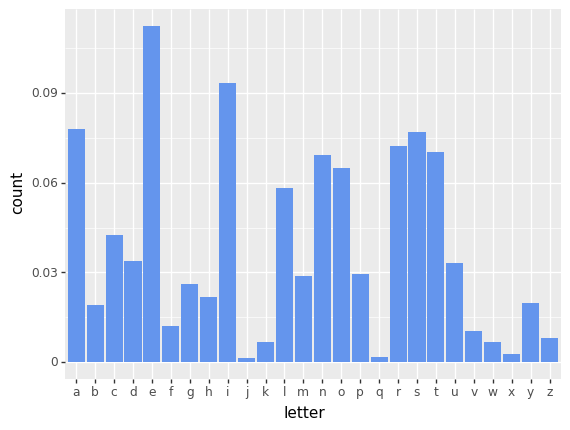

<ggplot: (7552180989)>

In [28]:
ggplot(letter_freq, aes(x = "letter", y = "count")) + \
geom_col(fill="cornflowerblue")

# Data Visualization Day 2

How does this frequency compare to actual use in English text?

Let's open a book and compare them.

In [29]:
eyeopen = open("Corpus2020/Books/Eye_Of_The_World.txt")

In [30]:
eye = eyeopen.read().lower()

In [31]:
eyeopen.close()

In [32]:
eye[:100]

'the eye of the world\n\n\ncontents\n\n\n\nprologue dragonmount\n\nmaps\n\n1 an empty road\n\n2 strangers\n\n3 the p'

We can gather the letter frequency counts in the same way, excluding all of the non alphabetic characters.

In [33]:
import string

d = {}
for w in eye:
    for c in w:
        if c in string.ascii_lowercase:
            d[c] = d.get(c, 0) + 1

In [34]:
d

{'t': 118462,
 'h': 91905,
 'e': 169271,
 'y': 24899,
 'o': 97502,
 'f': 27032,
 'w': 34762,
 'r': 74762,
 'l': 57759,
 'd': 67030,
 'c': 25141,
 'n': 90662,
 's': 79046,
 'p': 18033,
 'g': 31303,
 'u': 34246,
 'a': 110140,
 'm': 32024,
 'i': 81013,
 'v': 10907,
 'k': 14259,
 'b': 20391,
 'z': 865,
 'q': 850,
 'x': 1002,
 'j': 1229}

And make a data frame to then plot the results.

In [35]:
eye_data = pd.DataFrame(list(zip(d.keys(), d.values())),
                       columns=['letter', 'count'])

In [36]:
eye_data["count"] /= eye_data["count"].sum()

In [37]:
eye_data

,letter,count
0,t,0.090120
1,h,0.069917
2,e,0.128773
3,y,0.018942
4,o,0.074174
5,f,0.020565
6,w,0.026445
7,r,0.056875
8,l,0.043940
9,d,0.050993


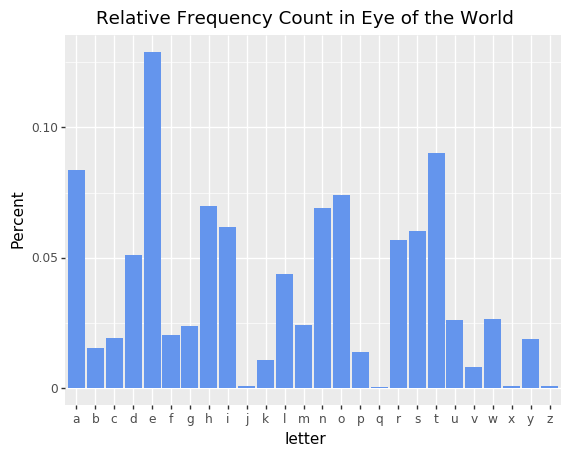

<ggplot: (7552733641)>

In [38]:
ggplot(eye_data, aes(x = "letter", y = "count")) + \
geom_col(fill="cornflowerblue") + \
ylab("Percent") + \
labs(title="Relative Frequency Count in Eye of the World")

## Comparing with a scatter plot

First, we need to merge the two data frames into one.

In [39]:
comb_freq = pd.merge(letter_freq, eye_data, on="letter")

In [40]:
comb_freq = comb_freq.rename(columns={"count_x":"Dictionary", 
                                     "count_y":"Wheel Of Time"})

In [41]:
comb_freq

,letter,Dictionary,Wheel Of Time
0,a,0.077946,0.083789
1,r,0.072285,0.056875
2,d,0.033843,0.050993
3,v,0.010420,0.008297
4,k,0.006908,0.010848
5,s,0.076885,0.060134
6,w,0.006688,0.026445
7,o,0.064933,0.074174
8,l,0.058300,0.043940
9,f,0.012159,0.020565


We can use geom_points to plot the letters on both the Dictionary and Wheel of Time axes.

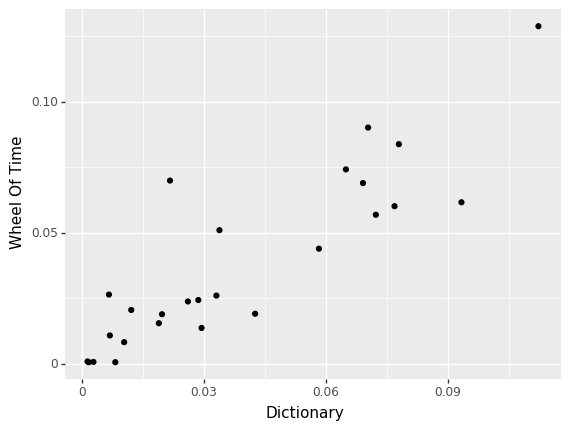

<ggplot: (7552180945)>

In [43]:
ggplot(comb_freq, aes(x = "Dictionary", y = "Wheel Of Time")) +\
geom_point()

By adding more pieces, like a 1:1 slope line, and replacing the points with text, we can better understand the comparison.

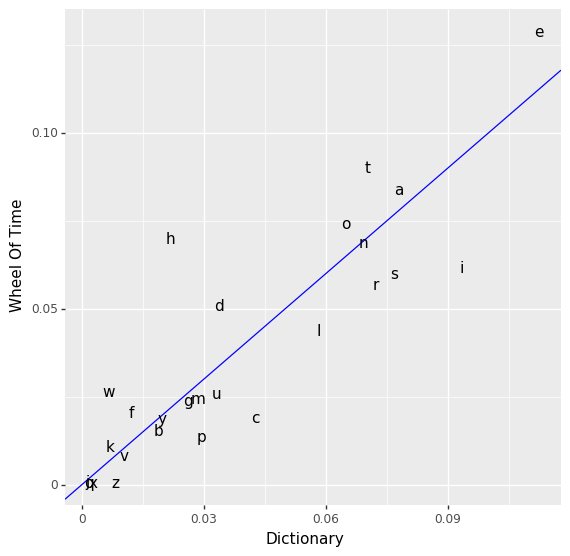

<ggplot: (7552733581)>

In [46]:
ggplot(comb_freq, aes(x = "Dictionary", y = "Wheel Of Time")) +\
geom_abline(intercept = 0, slope = 1, color="blue") + \
geom_text(aes(label="letter")) + \
theme(aspect_ratio = 1)

## Comparing with dodged column plot

To draw a comparison with a column plot, we need to *melt* the data, essentially pivot some of the columns into rows. This way we can treat each category as a *series* in our plotting.

In [47]:
comb_freq_melt = pd.melt(comb_freq, id_vars=["letter"], var_name="categories")

In [48]:
comb_freq_melt

,letter,categories,value
0,a,Dictionary,0.077946
1,r,Dictionary,0.072285
2,d,Dictionary,0.033843
3,v,Dictionary,0.010420
4,k,Dictionary,0.006908
5,s,Dictionary,0.076885
6,w,Dictionary,0.006688
7,o,Dictionary,0.064933
8,l,Dictionary,0.058300
9,f,Dictionary,0.012159


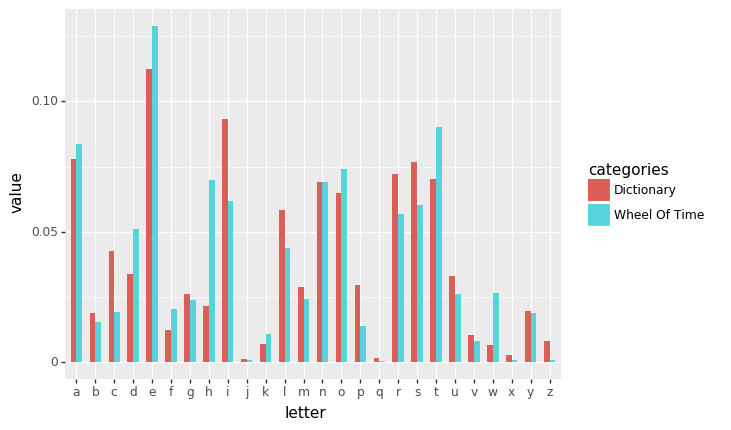

<ggplot: (7554667149)>

In [49]:
ggplot(comb_freq_melt, aes(x = "letter", y = "value", fill="categories")) + \
geom_col(position="dodge", width=0.6)

## Word Frequency

Finally, we want to analyze the word frequency of the book. Languages follow an inverse power law, where the most frequent words are extremely frequent, and the least frequent are usually used only once. This can be captured by 
comparing the frequency and rank on a log/log plot.

In [70]:
eye[:100]

'the eye of the world\n\n\ncontents\n\n\n\nprologue dragonmount\n\nmaps\n\n1 an empty road\n\n2 strangers\n\n3 the p'

We need to remove all of the characters except for letters and spaces. Then we can split this up to get the words.

In [50]:
import re
eye = re.sub(r'[^\w\s]', ' ', eye)

In [51]:
eye.split()[:200]

['the',
 'eye',
 'of',
 'the',
 'world',
 'contents',
 'prologue',
 'dragonmount',
 'maps',
 '1',
 'an',
 'empty',
 'road',
 '2',
 'strangers',
 '3',
 'the',
 'peddler',
 '4',
 'the',
 'gleeman',
 '5',
 'winternight',
 '6',
 'the',
 'westwood',
 '7',
 'out',
 'of',
 'the',
 'woods',
 '8',
 'a',
 'place',
 'of',
 'safety',
 '9',
 'tellings',
 'of',
 'the',
 'wheel',
 '10',
 'leavetaking',
 '11',
 'the',
 'road',
 'to',
 'taren',
 'ferry',
 '12',
 'across',
 'the',
 'taren',
 '13',
 'choices',
 '14',
 'the',
 'stag',
 'and',
 'lion',
 '15',
 'strangers',
 'and',
 'friends',
 '16',
 'the',
 'wisdom',
 '17',
 'watchers',
 'and',
 'hunters',
 '18',
 'the',
 'caemlyn',
 'road',
 '19',
 'shadow',
 's',
 'waiting',
 '20',
 'dust',
 'on',
 'the',
 'wind',
 '21',
 'listen',
 'to',
 'the',
 'wind',
 '22',
 'a',
 'path',
 'chosen',
 '23',
 'wolfbrother',
 '24',
 'flight',
 'down',
 'the',
 'arinelle',
 '25',
 'the',
 'traveling',
 'people',
 '26',
 'whitebridge',
 '27',
 'shelter',
 'from',
 'the'

In [52]:
d = {}
for w in eye.split():
    d[w] = d.get(w, 0) + 1

In [53]:
d["the"]

19664

Now, we can make our data frame. It will take some extra effort to sort it and add the ranks.

In [56]:
eye_words = pd.DataFrame(list(zip(d.keys(), d.values())),
                         columns = ["word", "count"])


In [57]:
eye_words

,word,count
0,the,19664
1,eye,195
2,of,6363
3,world,229
4,contents,7
...,...,...
11413,1977,1
11414,september,1
11415,2007,1
11416,page,2


In [58]:
eye_words["count"].sum()

319171

In [59]:
eye_words_sorted = eye_words.sort_values("count", ascending = False)

In [60]:
eye_words_sorted.head(20)

,word,count
0,the,19664
44,and,8188
35,to,7397
26,a,6806
297,he,6763
2,of,6363
282,his,4626
85,in,4127
331,was,3845
172,it,3762


In [61]:
eye_words_sorted["rank"] = range(1, len(eye_words_sorted) + 1)

Now, we can make a plot. First, we see how it looks on a standard axis, then we show the scaling with log on both the x and y.

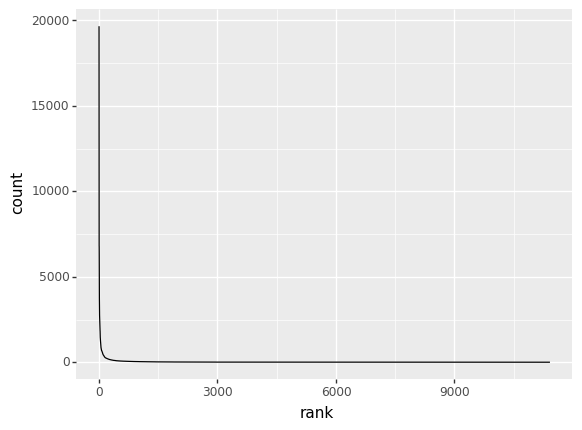

<ggplot: (7554927137)>

In [62]:
ggplot(eye_words_sorted, aes(x = "rank", y = "count")) + \
geom_line()

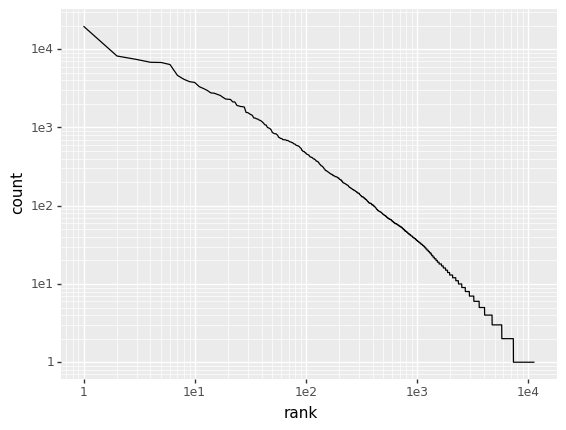

<ggplot: (7554911973)>

In [63]:
ggplot(eye_words_sorted, aes(x = "rank", y = "count")) + \
geom_line() + \
scale_x_log10() + \
scale_y_log10()

If we want to draw a line on this graph for the function $1/rank$, we can add columns to the data frame, with the log of the count, rank, and then the $1/rank$ function.

In [64]:
import numpy as np

eye_words_sorted["logcount"] = np.log(eye_words_sorted["count"])

In [65]:
eye_words_sorted["logrank"] = np.log(eye_words_sorted["rank"])

In [66]:
eye_words_sorted["inverse"] = np.log(eye_words_sorted["count"].max() / eye_words_sorted["rank"])

In [67]:
eye_words_sorted

,word,count,rank,logcount,logrank,inverse
0,the,19664,1,9.886545,0.000000,9.886545
44,and,8188,2,9.010425,0.693147,9.193398
35,to,7397,3,8.908830,1.098612,8.787933
26,a,6806,4,8.825560,1.386294,8.500250
297,he,6763,5,8.819222,1.609438,8.277107
...,...,...,...,...,...,...
8056,commented,1,11414,0.000000,9.342596,0.543949
8057,crews,1,11415,0.000000,9.342684,0.543861
8058,grudges,1,11416,0.000000,9.342771,0.543774
3368,raking,1,11417,0.000000,9.342859,0.543686


To get our two series to plot, we once again melt the data frame, and then plot.

In [68]:
melted_eye = eye_words_sorted.melt(id_vars=["logrank"],
                                  value_vars=["logcount", "inverse"], 
                                  var_name="series", 
                                  value_name="logcount")

In [69]:
melted_eye

,logrank,series,logcount
0,0.000000,logcount,9.886545
1,0.693147,logcount,9.010425
2,1.098612,logcount,8.908830
3,1.386294,logcount,8.825560
4,1.609438,logcount,8.819222
...,...,...,...
22831,9.342596,inverse,0.543949
22832,9.342684,inverse,0.543861
22833,9.342771,inverse,0.543774
22834,9.342859,inverse,0.543686


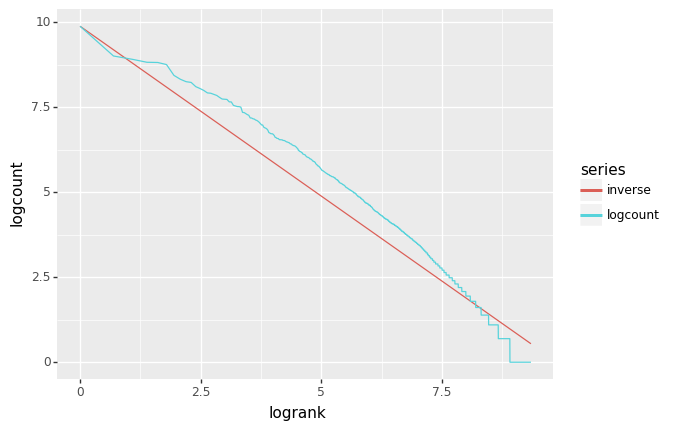

<ggplot: (7554075161)>

In [70]:
ggplot(melted_eye, aes(x = "logrank", y = "logcount", color="series", group = "series")) + \
geom_line()